In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x) #opción para evitar la notacion cientifica

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,nan,0.00000,nan,nan,0.00000,nan,...,1803.98700,nan,597.02900,9.59000,nan,nan,37.74600,0.50000,64.83000,0.49800
1,AFG,Asia,Afghanistan,2020-01-01,nan,0.00000,nan,nan,0.00000,nan,...,1803.98700,nan,597.02900,9.59000,nan,nan,37.74600,0.50000,64.83000,0.49800
2,AFG,Asia,Afghanistan,2020-01-02,nan,0.00000,nan,nan,0.00000,nan,...,1803.98700,nan,597.02900,9.59000,nan,nan,37.74600,0.50000,64.83000,0.49800
3,AFG,Asia,Afghanistan,2020-01-03,nan,0.00000,nan,nan,0.00000,nan,...,1803.98700,nan,597.02900,9.59000,nan,nan,37.74600,0.50000,64.83000,0.49800
4,AFG,Asia,Afghanistan,2020-01-04,nan,0.00000,nan,nan,0.00000,nan,...,1803.98700,nan,597.02900,9.59000,nan,nan,37.74600,0.50000,64.83000,0.49800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55888,NaN,NaN,International,2020-11-06,696.00000,nan,nan,7.00000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
55889,NaN,NaN,International,2020-11-07,696.00000,nan,nan,7.00000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
55890,NaN,NaN,International,2020-11-08,696.00000,nan,nan,7.00000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
55891,NaN,NaN,International,2020-11-09,696.00000,nan,nan,7.00000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_r

In [23]:
df_ven = df.loc[(df.iso_code == "VEN") & (df.new_cases > 0)][['date', 'new_cases']]


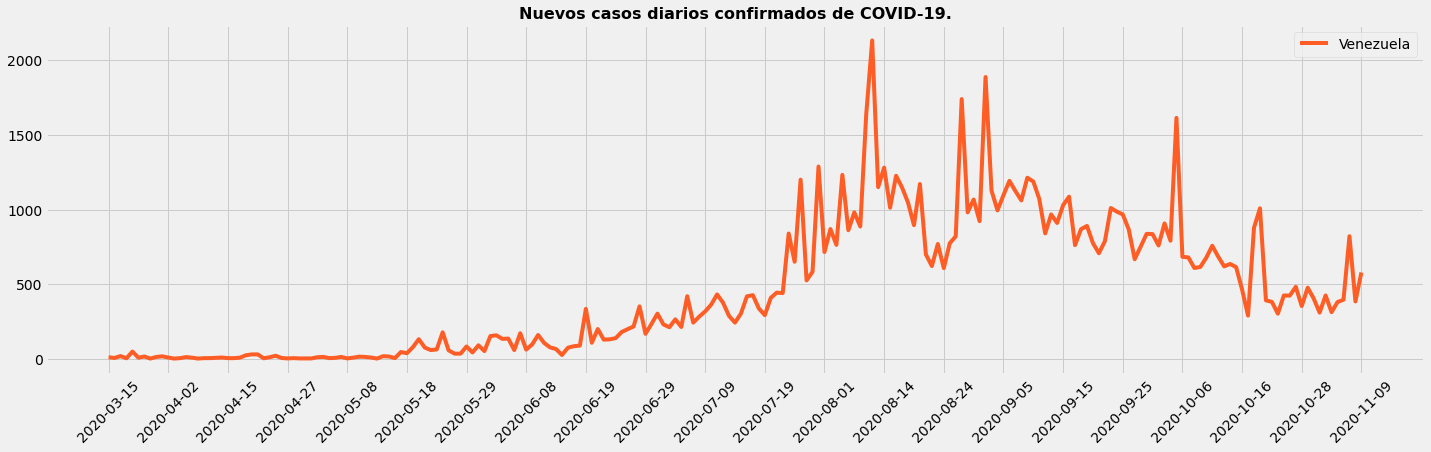

In [25]:
df_ven.index = df_ven.date
plt.figure(figsize=(22,6))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19.', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.date, df_ven.new_cases, '#fe5d26', label = 'Venezuela')
x_ticks = np.arange(0, len(df_ven.date), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [26]:
df_ven["New_cases_roll_ven"] = df_ven.new_cases.rolling(7).mean()

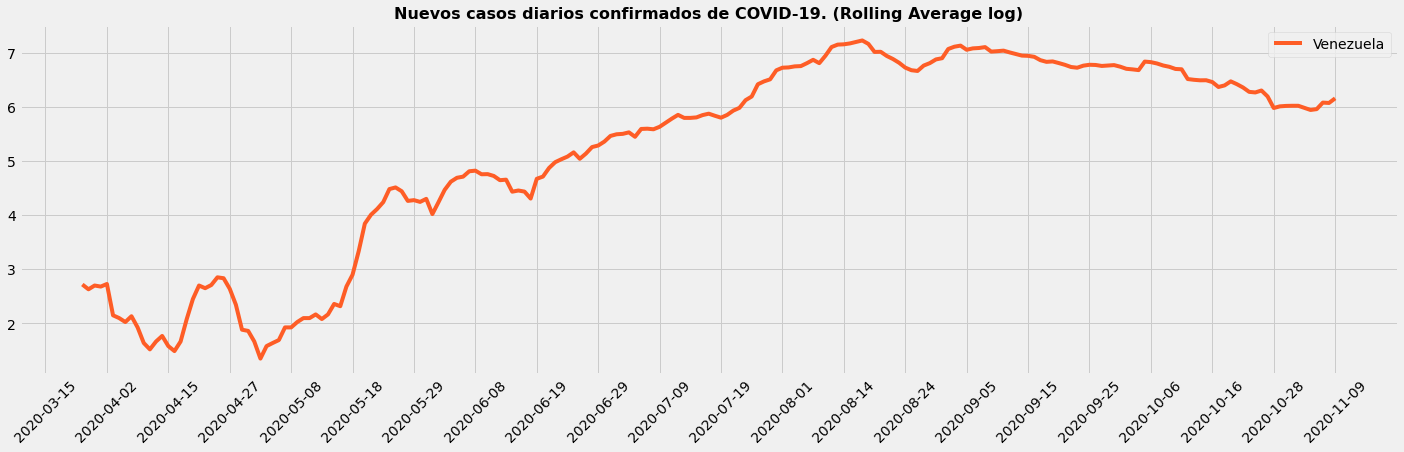

In [28]:
df_ven.index = df_ven.date
plt.figure(figsize=(22,6))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19. (Rolling Average log)', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.date, np.log(df_ven.New_cases_roll_ven), '#fe5d26', label = 'Venezuela')
x_ticks = np.arange(0, len(df_ven.date), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()